In [1]:
from pathlib import Path
from tqdm.auto import tqdm

import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import cartopy
import cmocean

from load_tuning_results import (
    load_results_raw,
    load_result_for_key,
    add_derived_features,
    filter_suspicious_routes,
    load_results,
    get_seed_routes_gdf,
    get_forcing_paths_df,
)

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
df = gpd.read_parquet("results/results_prelim.geoparquet")
df = add_derived_features(df)
df

,hyper_population_size,hyper_random_seed,hyper_selection_acceptance_rate_warmup,hyper_mutation_width_fraction_warmup,hyper_mutation_displacement_fraction_warmup,hyper_generations,hyper_offspring_size,hyper_crossover_rounds,hyper_selection_quantile,hyper_selection_acceptance_rate,...,n_elite,elite_length_meters,elite_length_relative,elite_cost_absolute,elite_cost_relative,geometry,hyper_num_individuals,journey_duration,seed_cost,elite_speed_og_mps_average
filename,,,,,,,,,,,,,,,,,,,,,
result:2025-12-06T17-46-22.757_c17b2c84-f6f5-4c24-86b1-576e05ce458f,32,202838879,0.3,0.5,0.10,4,32,0,0.10,0.00,...,0,6.093342e+06,1.000000,NaN,NaN,"LINESTRING (-11 50, -12.5391 50.09982, -14.083...",128,13 days 17:00:51,inf,5.144445
result:2025-12-06T17-45-47.883_8a96049a-b448-4688-a683-7bc1ad2f08f1,32,240864382,0.3,0.9,0.10,4,32,1,0.10,0.25,...,0,6.093342e+06,1.000000,NaN,NaN,"LINESTRING (-11 50, -12.5391 50.09982, -14.083...",128,13 days 17:00:51,inf,5.144445
result:2025-12-06T17-44-58.180_8709a686-711d-4bf0-a5df-1d5eaf040a8d,128,1282251641,0.3,0.5,0.25,1,128,2,0.25,0.00,...,0,6.102691e+06,1.001534,9.154279e+12,0.948557,"LINESTRING (-11 50, -12.53111 50.10597, -14.06...",128,13 days 17:00:51,9.650747e+12,5.152337
result:2025-12-06T17-44-58.180_8709a686-711d-4bf0-a5df-1d5eaf040a8d,128,1282251641,0.3,0.5,0.25,1,128,2,0.25,0.00,...,1,6.096694e+06,1.000550,9.457689e+12,0.979995,"LINESTRING (-11 50, -12.52763 50.10524, -14.06...",128,13 days 17:00:51,9.650747e+12,5.147274
result:2025-12-06T16-34-19.208_1ba20d20-34f7-44e0-b86b-61d0db88fe09,32,3459840799,0.3,0.5,0.25,4,32,2,0.25,0.25,...,0,6.237164e+06,1.023603,1.018871e+13,0.000000,"LINESTRING (-80.5 30, -79.65864 30.68667, -78....",128,13 days 17:00:51,inf,5.265869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
result:2025-12-07T20-31-58.625_46e15cd9-a913-45f7-8281-cbaa2872ee10,128,1835893064,0.3,0.5,0.25,4,128,0,0.10,0.00,...,0,6.117856e+06,1.004023,8.579450e+12,0.911326,"LINESTRING (-11 50, -12.84446 50.09778, -14.64...",512,11 days 10:10:42,9.414248e+12,6.198172
result:2025-12-07T20-31-58.625_46e15cd9-a913-45f7-8281-cbaa2872ee10,128,1835893064,0.3,0.5,0.25,4,128,0,0.10,0.00,...,1,6.117856e+06,1.004023,8.579450e+12,0.911326,"LINESTRING (-11 50, -12.84446 50.09778, -14.64...",512,11 days 10:10:42,9.414248e+12,6.198172
result:2025-12-07T20-11-44.075_c6ae1298-a99c-48fd-ad6f-ba982e260699,128,3662113073,0.3,0.9,0.10,2,128,1,0.10,0.25,...,0,6.093342e+06,1.000000,NaN,NaN,"LINESTRING (-80.5 30, -79.4778 30.80166, -78.4...",256,11 days 10:10:42,inf,6.173337


In [4]:
# adapt from seed route! (to be loaded)
import shapely

lon_min, lat_min = df.bounds.min().iloc[::2]
lon_max, lat_max = df.bounds.max().iloc[1::2]

lon_min, lon_max = -80 - 5, -10 + 5
lat_min, lat_max = 30 - 5, 50 + 5
print(lon_min, lon_max, lat_min, lat_max)

lon_cent = (lon_min + lon_max) / 2.0
lat_cent = (lat_min + lat_max) / 2.0
print(lon_cent, lat_cent)

-85 -5 25 55
-45.0 40.0


In [5]:
# Load results
results = load_results(["results/results_19430020.msgpack"])

records:   0%|          | 0/1989 [00:00<?, ?it/s]

In [6]:
# Extract seed routes
seed_gdf = get_seed_routes_gdf(results)
seed_gdf

seed routes:   0%|          | 0/1989 [00:00<?, ?it/s]

,seed_length_meters,geometry
filename,,
result:2025-12-06T17-46-22.757_c17b2c84-f6f5-4c24-86b1-576e05ce458f,6.093342e+06,"LINESTRING (-11 50, -12.5391 50.09982, -14.083..."
result:2025-12-06T17-45-47.883_8a96049a-b448-4688-a683-7bc1ad2f08f1,6.093342e+06,"LINESTRING (-11 50, -12.5391 50.09982, -14.083..."
result:2025-12-06T17-44-58.180_8709a686-711d-4bf0-a5df-1d5eaf040a8d,6.093342e+06,"LINESTRING (-11 50, -12.5391 50.09982, -14.083..."
result:2025-12-06T16-34-19.208_1ba20d20-34f7-44e0-b86b-61d0db88fe09,6.093342e+06,"LINESTRING (-80.5 30, -79.64622 30.67104, -78...."
result:2025-12-06T16-52-02.421_55875002-ea2e-4cd2-9733-ab2634d0b5f8,6.093342e+06,"LINESTRING (-80.5 30, -79.64622 30.67104, -78...."
...,...,...
result:2025-12-06T16-48-34.576_37806ea0-417a-4244-b0e1-c6b87a121e31,6.093342e+06,"LINESTRING (-80.5 30, -79.64622 30.67104, -78...."
result:2025-12-06T17-34-13.902_119dc432-f4e9-4769-83f7-0a5ee0b9420d,6.093342e+06,"LINESTRING (-11 50, -12.5391 50.09982, -14.083..."
result:2025-12-06T17-07-03.019_16587069-7b34-4460-acf6-d81b11de38a7,6.093342e+06,"LINESTRING (-80.5 30, -79.64622 30.67104, -78...."


In [7]:
# Extract forcing paths
forcing_df = get_forcing_paths_df(results)
with pd.option_context("display.max_colwidth", None):
    display(forcing_df.iloc[0])

forcing_currents_path                                  data_large/cmems_mod_glo_phy_my_0.083deg_P1D-m_time_2021_lat_+10_+65_lon_-100_+010_uo-vo.zarr
forcing_waves_path                                  data_large/cmems_mod_glo_wav_my_0.2deg_PT3H-i_time_2021_lat_+10_+65_lon_-100_+010_VHM0-VMDR.zarr
forcing_winds_path       data_large/cmems_obs-wind_glo_phy_my_l4_0.125deg_PT1H_time_2021_lat_+10_+65_lon_-100_+010_eastward_wind-northward_wind.zarr
Name: result:2025-12-06T17-46-22.757_c17b2c84-f6f5-4c24-86b1-576e05ce458f, dtype: object

In [8]:
import xarray as xr

In [9]:
ds_currents = xr.open_zarr(forcing_df["forcing_currents_path"].iloc[0])
ds_currents = ds_currents.sel(
    longitude=slice(lon_min, lon_max), latitude=slice(lat_min, lat_max)
)
ds_currents = ds_currents.assign(
    speed=(ds_currents.to_array() ** 2).sum("variable") ** 0.5
)
ds_currents = ds_currents.resample(time="1M").mean().compute()
ds_currents = ds_currents.where(ds_currents.speed > 0)
ds_currents

<xarray.Dataset> Size: 50MB
Dimensions:    (time: 12, latitude: 361, longitude: 961)
Coordinates:
  * time       (time) datetime64[ns] 96B 2021-01-31 2021-02-28 ... 2021-12-31
  * latitude   (latitude) float32 1kB 25.0 25.08 25.17 ... 54.83 54.92 55.0
  * longitude  (longitude) float32 4kB -85.0 -84.92 -84.83 ... -5.083 -5.0
    depth      float32 4B 0.494
Data variables:
    uo         (time, latitude, longitude) float32 17MB -0.1226 -0.1284 ... nan
    vo         (time, latitude, longitude) float32 17MB -0.395 -0.3546 ... nan
    speed      (time, latitude, longitude) float32 17MB 0.4703 0.4254 ... nan
Attributes: (12/24)
    Conventions:        CF-1.4
    bulletin_date:      2021-07-07 00:00:00
    bulletin_type:      operational
    comment:            CMEMS product
    domain_name:        GL12
    easting:            longitude
    ...                 ...
    northing:           latitude
    references:         http://www.mercator-ocean.fr
    source:             MERCATOR GLORYS12V1
    title:              daily mean fields from Global Ocean Physics Analysis ...
    z_max:              5727.9169921875
    z_min:              0.49402499198913574

In [10]:
ds_waves = xr.open_zarr(forcing_df["forcing_waves_path"].iloc[0])
ds_waves = ds_waves.sel(
    longitude=slice(lon_min, lon_max), latitude=slice(lat_min, lat_max)
)
ds_waves = ds_waves.resample(time="1M").quantile(0.9).compute()
ds_waves

<xarray.Dataset> Size: 12MB
Dimensions:    (time: 12, latitude: 151, longitude: 401)
Coordinates:
  * time       (time) datetime64[ns] 96B 2021-01-31 2021-02-28 ... 2021-12-31
  * latitude   (latitude) float32 604B 25.0 25.2 25.4 25.6 ... 54.6 54.8 55.0
  * longitude  (longitude) float32 2kB -85.0 -84.8 -84.6 ... -5.4 -5.2 -5.0
    quantile   float64 8B 0.9
Data variables:
    VHM0       (time, latitude, longitude) float64 6MB 1.926 1.89 ... 2.03 nan
    VMDR       (time, latitude, longitude) float64 6MB 320.4 321.4 ... 310.2 nan

In [11]:
ds_winds = xr.open_zarr(forcing_df["forcing_winds_path"].iloc[0])
ds_winds = ds_winds.sel(
    longitude=slice(lon_min, lon_max), latitude=slice(lat_min, lat_max)
)
ds_winds = ds_winds.assign(
    speed=(ds_winds.to_array() ** 2).sum("variable").compute() ** 0.5
)
ds_winds = ds_winds.resample(time="1M").quantile(0.9)  # .compute()
ds_winds

<xarray.Dataset> Size: 44MB
Dimensions:         (time: 12, latitude: 240, longitude: 640)
Coordinates:
  * time            (time) datetime64[ns] 96B 2021-01-31 ... 2021-12-31
  * latitude        (latitude) float32 960B 25.06 25.19 25.31 ... 54.81 54.94
  * longitude       (longitude) float32 3kB -84.94 -84.81 ... -5.188 -5.062
    quantile        float64 8B 0.9
Data variables:
    eastward_wind   (time, latitude, longitude) float64 15MB dask.array<chunksize=(1, 130, 346), meta=np.ndarray>
    northward_wind  (time, latitude, longitude) float64 15MB dask.array<chunksize=(1, 130, 346), meta=np.ndarray>
    speed           (time, latitude, longitude) float64 15MB 8.978 ... 12.56

In [12]:
times = [f"2021-{mm:02d}" for mm in [1, 3, 5, 7, 9, 11]]
times

['2021-01', '2021-03', '2021-05', '2021-07', '2021-09', '2021-11']

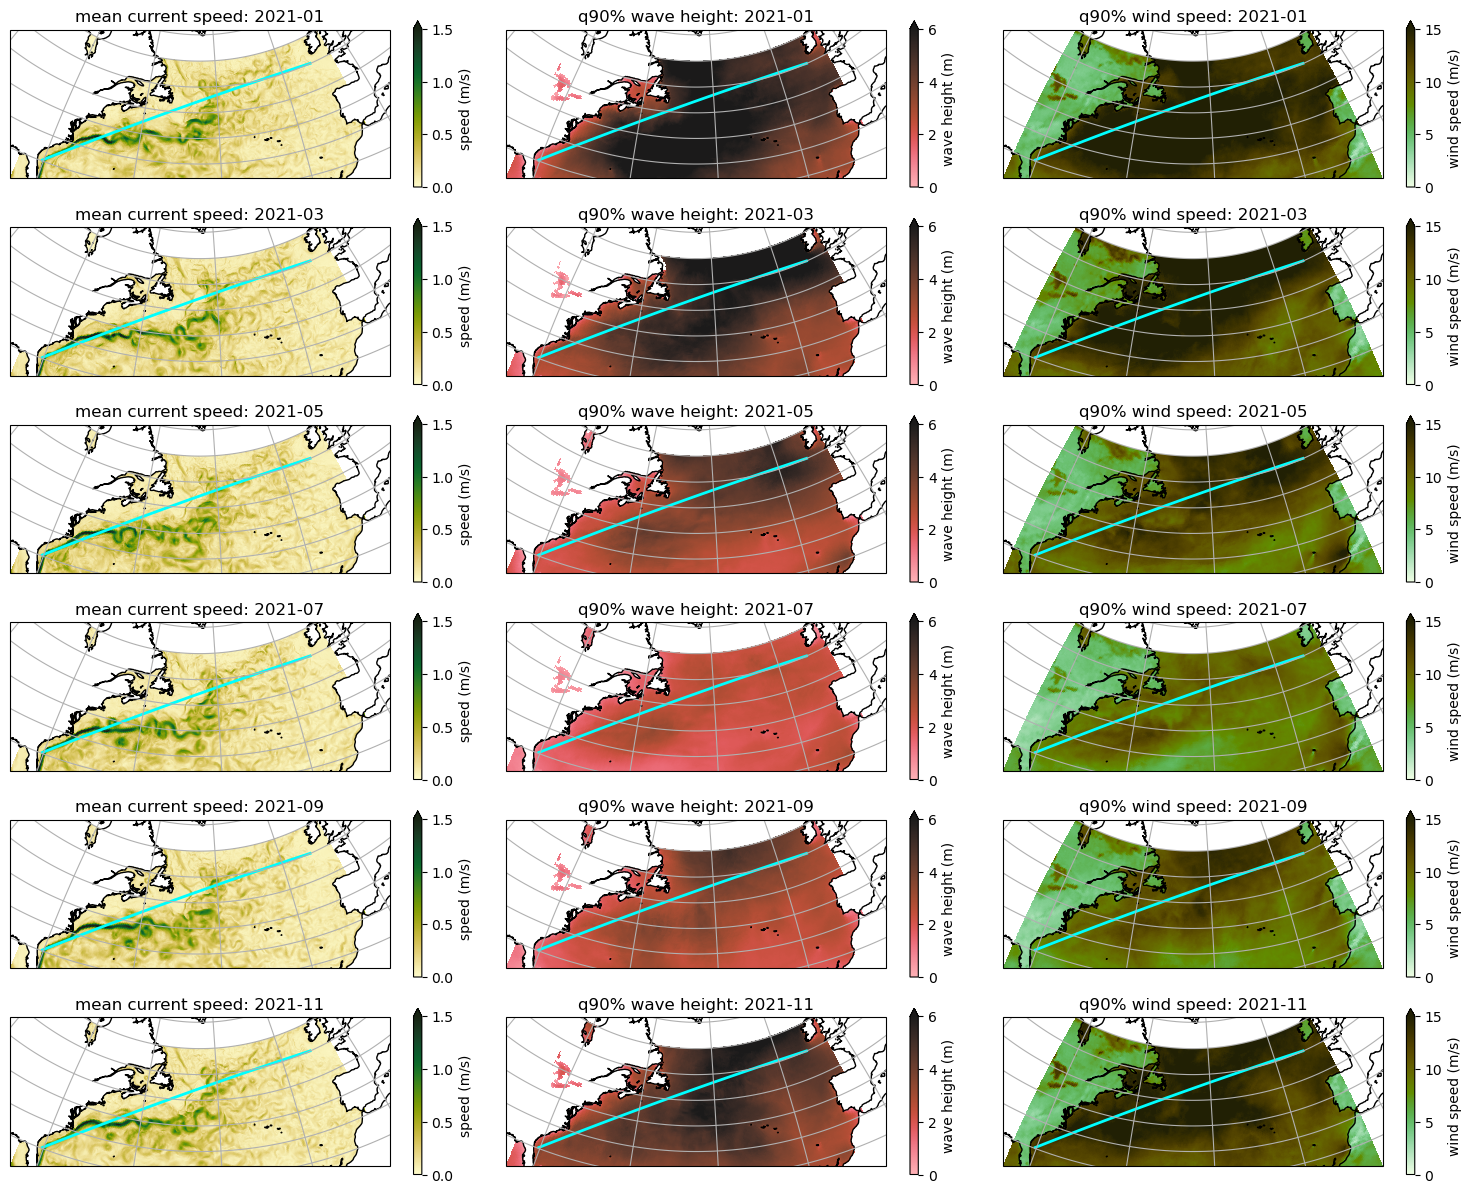

In [ ]:
fig, ax = plt.subplots(
    len(times),
    3,
    subplot_kw={
        "projection": cartopy.crs.Stereographic(
            central_latitude=lat_cent, central_longitude=lon_cent
        )
    },
    figsize=(15, 12),
    sharex=True,
    sharey=True,
)

for n in range(len(times)):
    _time = times[n]
    for m in range(3):
        _ax = ax[n, m]
        seed_gdf.iloc[:1].plot(
            ax=_ax, transform=cartopy.crs.PlateCarree(), color="cyan", linewidth=2
        )
        if m == 0:
            ds_currents.speed.sel(time=_time).plot(
                ax=_ax,
                transform=cartopy.crs.PlateCarree(),
                vmin=0,
                vmax=1.5,
                extend="max",
                cmap=cmocean.cm.speed,
                cbar_kwargs={"label": "speed (m/s)"},
            )
            _title = f"mean current speed: {_time}"
        if m == 1:
            ds_waves.VHM0.sel(time=_time).plot(
                ax=_ax,
                transform=cartopy.crs.PlateCarree(),
                vmin=0,
                vmax=6.0,
                extend="max",
                cmap=cmocean.cm.amp_i_r,
                cbar_kwargs={"label": "wave height (m)"},
            )
            _title = f"q90% wave height: {_time}"
        if m == 2:
            ds_winds.speed.sel(time=_time).plot(
                ax=_ax,
                transform=cartopy.crs.PlateCarree(),
                vmin=0,
                vmax=15.0,
                extend="max",
                cmap=cmocean.cm.speed_i_r,
                cbar_kwargs={"label": "wind speed (m/s)"},
            )
            _title = f"q90% wind speed: {_time}"
        _ax.coastlines()
        _ax.gridlines()
        _ax.set_title(_title)
        _ax.set_extent([lon_min, lon_max, lat_min, lat_max])

fig.tight_layout()

fig.savefig("figures/test_cases_journey_and_forcing_overview.png", dpi=200)